In [1]:
import numpy as np
import pandas as pd

from ylearn.exp_dataset.exp_data import single_continuous_treatment
from ylearn import Why

In [2]:
import warnings
warnings.filterwarnings('ignore')

from ylearn.utils import logging
logging.set_level('warn')

pd.set_option('display.max.columns',100)

In [3]:
def show_identify_result(r):
    assert isinstance(r,(tuple,list)) and len(r)==4
    
    print('-' * 50, '\n>>>identify result:')
    print('\t treatment:', r[0])
    print('\t adjustment:', r[1])
    print('\t covariate:', r[2])
    print('\t instrument:', r[3])

# Synthetic Data

In [4]:
train, _, _ = single_continuous_treatment()
train

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10,w_11,w_12,w_13,w_14,w_15,w_16,w_17,w_18,w_19,w_20,w_21,w_22,w_23,w_24,w_25,w_26,w_27,w_28,w_29,c_0,treatment,outcome,TE
1212,-1.010090,-1.793770,-0.704964,0.083557,0.481427,-0.048769,-0.194278,-0.817631,0.267509,0.388186,-1.000674,1.950316,1.080995,0.075209,-1.034355,-0.625918,0.742429,0.647821,1.471764,0.459824,-0.781354,-0.442670,-0.239709,0.174202,0.705857,-1.235907,-1.240211,0.307156,-0.250887,0.955369,0.155103,-0.049943,-0.391496,1.363705
1690,0.458838,0.284358,-0.456428,1.166463,-1.124323,-0.093801,3.306066,1.980896,0.628333,-0.282192,1.697153,-0.632167,-0.075338,-0.596487,-0.089663,0.528665,0.122592,0.783216,1.354029,-1.439747,-0.730348,0.838384,0.403446,0.018890,-2.091498,0.994543,2.341314,0.946668,0.601337,-0.028910,0.335181,-0.495657,-0.884389,1.954943
1198,-0.894299,0.720393,1.682601,0.215710,0.732282,-1.210671,0.305657,-0.427936,3.042174,-0.673378,-0.844597,0.224793,1.435079,-0.502318,-0.481313,0.389014,-0.128604,-0.910690,-0.267043,-1.000008,-0.256730,-0.452647,0.423028,-1.396297,0.527429,1.084672,0.017845,-1.970667,0.183399,0.292241,0.547452,1.082807,3.535996,2.988898
401,-0.298571,-1.671269,0.260021,-1.836556,1.249896,-2.137694,0.234445,-1.012757,-0.203846,-0.045091,1.551032,-0.415552,-1.978212,0.334586,-1.547945,-0.278606,0.504401,-0.204793,1.025546,0.463838,-0.491456,1.566413,1.057893,-0.697999,-0.147662,0.010062,-0.701577,-0.903222,-0.303378,-1.196278,0.477712,-0.726763,-5.814209,2.599774
512,-0.008337,0.312129,2.535573,-1.778272,2.412057,-2.550452,0.696291,1.054566,1.074932,-0.494271,1.671923,-0.639357,0.108510,-0.482555,0.764771,0.907849,0.579551,-0.875433,0.720055,1.185049,1.395763,1.132203,0.553168,0.436000,1.084067,-1.606550,0.782404,0.928994,-2.466212,-1.042824,0.076972,3.144719,5.347627,1.166426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,0.473488,-0.246827,-0.829371,0.167178,2.051812,-1.098893,-2.022564,1.115111,-0.843840,0.027017,-0.553127,0.356466,1.096400,-0.087912,-1.401664,1.365169,0.450047,0.559708,-0.970676,-1.148888,0.275131,-0.463953,-0.969223,0.734411,0.659410,-0.066118,0.836309,-0.187636,-1.201602,-0.812195,0.887783,1.707117,9.797455,5.903625
929,0.062928,0.663101,-0.003895,0.283313,0.150168,0.676016,-0.800642,-2.142750,1.956881,-0.023682,1.099959,-2.403769,1.360265,0.994710,-0.077585,-0.968666,-0.408629,0.267509,1.121403,0.127599,1.345584,0.608431,-0.256362,0.433028,0.492842,-0.446452,-1.392282,0.161448,-0.281472,2.292087,0.540622,0.008218,1.633430,2.948346
652,-0.474054,-0.208888,0.843013,1.233498,0.275309,2.065287,0.029058,0.007994,1.498871,0.045821,1.323936,1.161092,1.716525,0.538593,-0.717446,-1.335793,-0.665003,1.571255,1.138385,1.449379,-3.483877,-0.228269,0.174992,1.713916,2.251417,-0.007995,-0.729207,0.872539,-1.748384,-0.784325,0.720702,-1.758245,-10.299303,4.226625
553,0.144784,-0.631134,-0.768283,0.646175,-2.800647,0.303113,1.030039,0.206670,0.752679,0.937146,1.580104,0.643499,0.127614,0.385628,0.327969,-0.182104,-0.375930,-0.220313,0.884250,-0.247101,1.628201,0.209721,1.175677,0.985607,-1.607408,1.784038,0.048513,0.593881,1.885963,0.295527,0.217212,-0.660572,0.237139,1.544072


# Identify with default settings

In [5]:
why=Why()
r = why.identify(train, 'outcome', treatment='treatment')
show_identify_result(r)

-------------------------------------------------- 
>>>identify result:
	 treatment: ['treatment']
	 adjustment: None
	 covariate: ['w_0', 'w_1', 'w_2', 'w_3', 'w_4', 'w_5', 'w_6', 'w_7', 'w_8', 'w_9', 'w_10', 'w_11', 'w_12', 'w_13', 'w_14', 'w_15', 'w_16', 'w_17', 'w_18', 'w_19', 'w_20', 'w_21', 'w_22', 'w_23', 'w_24', 'w_25', 'w_26', 'w_27', 'w_28', 'w_29', 'c_0', 'TE']
	 instrument: None


# Identify with discovery

In [6]:
# why=Why(identifier='discovery', identifier_options=dict(method=('backdoor','simple')))
why=Why(identifier='discovery', identifier_options=dict( threshold=0.02, verbose=True), random_state=123)
r = why.identify(train, 'outcome', treatment='treatment')
show_identify_result(r)

learning..:   0%|          | 0/100 [00:00<?, ?it/s]

-------------------------------------------------- 
>>>identify result:
	 treatment: ['treatment']
	 adjustment: None
	 covariate: ['w_4', 'w_7', 'w_12', 'w_14', 'w_20', 'c_0']
	 instrument: None


# Identify with gcastle proxy

In [7]:
why=Why(identifier='gcastle')
r = why.identify(train, 'outcome', treatment='treatment')
show_identify_result(r)

-------------------------------------------------- 
>>>identify result:
	 treatment: ['treatment']
	 adjustment: None
	 covariate: ['w_4', 'w_12', 'w_14', 'w_20', 'w_24']
	 instrument: ['w_7', 'w_8']


In [8]:
from castle.algorithms import NotearsNonlinear

learner = NotearsNonlinear(device_type='gpu', hidden_layers=[train.shape[1], 1] )

why=Why(identifier='gcastle', identifier_options=dict(learner=learner))
r = why.identify(train, 'outcome', treatment='treatment')
show_identify_result(r)

-------------------------------------------------- 
>>>identify result:
	 treatment: ['treatment']
	 adjustment: None
	 covariate: ['w_12', 'w_14', 'w_20', 'c_0', 'TE']
	 instrument: None


# Identify with pgmpy proxy

In [9]:
why=Why(identifier='pgm')
r = why.identify(train, 'outcome', treatment='treatment')
show_identify_result(r)

-------------------------------------------------- 
>>>identify result:
	 treatment: ['treatment']
	 adjustment: None
	 covariate: ['w_12', 'w_14', 'w_20', 'w_4', 'w_7']
	 instrument: None


In [10]:
options = dict( learner='PC',
                variant="parallel",
                ci_test="pearsonr",
                max_cond_vars=10,
                significance_level=0.001,
                n_jobs=-1,
                show_progress=True,
                )
why=Why(identifier='pgm', identifier_options=options)
r = why.identify(train, 'outcome', treatment='treatment')
show_identify_result(r)

  0%|          | 0/10 [00:00<?, ?it/s]

-------------------------------------------------- 
>>>identify result:
	 treatment: ['treatment']
	 adjustment: None
	 covariate: ['w_12', 'w_14', 'w_20', 'w_4', 'w_7']
	 instrument: None


# Plot Causal Graph

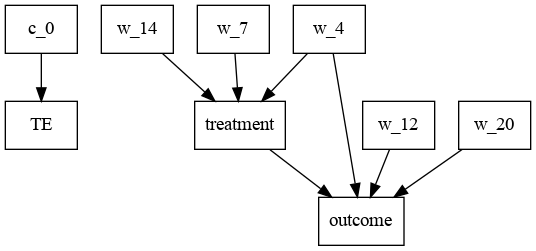

In [11]:
# why.identifier_.plot(prog='dot', width=500)
why.identifier_.plot(prog='dot', width=500, fmt='png')